# Ejercicio 3 -   Regresión Lineal con Keras

En este ejercicio, tu objetivo será entrenar modelos de Regresión Lineal utilizando Keras (y Tensorflow como backend) para familiarizarte con la librería y comprender la relación de sus clases y métodos con los que definimos en los ejercicios 1 y 2.



In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib 
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import utils

Using matplotlib backend: Qt5Agg


# Creando modelos de regresión y prediciendo valores

El siguiente codigo crea modelos de Keras con distintos valores de `w` y `b` y verifica su salida.

Para crear un modelo de Keras utilizamos la clase `Sequential`, que permite utilizar modelos de varias capas. No obstante, en este caso vamos a crear modelos con una sola capa, la capa de clase `Dense` (también conocida como `fully connected` o `lineal`), que permite hacer regresión lineal con varias variables de entrada y de salida. 

Al crear la capa, especificamos la dimensionalidad de salida (1 en este caso) y la de entrada (2 en este caso). De esta forma el modelo puede crear e inicializar los parámetros `W` y `b`.

Como estamos probando un modelo puramente lineal, especificamos `activation=None` para que Keras no agregue ninguna función no-lineal a la salida.

Por último, utilizamos los parámetros por nombre `kernel_initializer` y `bias_initializer` de la clase `Dense` para especificar como inicializar los parámetros `w` (kernel) y `b` (bias) respectivamente. En este caso, utilizamos `keras.initializers.Constant` para inicializarlo con algunos valores constantes.

Ejecuta el siguiente bloque para verificar que en las 4 pruebas la función `predict` de los modelos de Keras hace lo mismo que la función `forward` vista anteriormente. En cada una de las pruebas, estamos inicializando el modelo con distintos valores de `w` y `b`.

In [2]:
import tensorflow as tf
import keras
import numpy as np

x=np.array([[1.0,2.0]
            ,[2.0,3.0]
            ,[3.0,4.0]])
dimensionalidad_salida=1
dimensionalidad_entrada=(2,)

# PRUEBA 1
# Defino un modelo con w=(0,0) y b=0
model1 = keras.Sequential([
    keras.layers.Dense(dimensionalidad_salida
                       # dimensionalidad de la entrada
                       ,input_shape=dimensionalidad_entrada
                       # activation=None para que no tenga f de activacion (r lineal)
                       ,activation=None 
                       # inicializo w=(0,0)
                      , kernel_initializer = keras.initializers.Constant(value=0)
                       # inicializo b=0
                      , bias_initializer   = keras.initializers.Constant(value=0))
])
y_prediccion = model1.predict(x)
y=np.zeros((3,1))
utils.verificar_igualdad(y,y_prediccion)


# PRUEBA 2
# Defino un modelo con w=(1,1) y b=0
model2 = keras.Sequential([
    keras.layers.Dense(dimensionalidad_salida
                       ,input_shape=dimensionalidad_entrada
                       , activation=None
                      , kernel_initializer = keras.initializers.Constant(value=1)
                      , bias_initializer   = keras.initializers.Constant(value=0))
])

y_prediccion = model2.predict(x)
y=np.array([[3.0,5.0,7.0]]).T
utils.verificar_igualdad(y,y_prediccion)

# PRUEBA 3
# Defino un modelo con w=(0,0) y b=1
model3 = keras.Sequential([
    keras.layers.Dense(dimensionalidad_salida
                       ,input_shape=dimensionalidad_entrada
                       , activation=None
                      , kernel_initializer = keras.initializers.Constant(value=0)
                      , bias_initializer   = keras.initializers.Constant(value=1))
])
y=np.ones((3,1))
y_prediccion = model3.predict(x)
utils.verificar_igualdad(y,y_prediccion)

# PRUEBA 4
# Defino un modelo con w=(1,1) y b=1
model4 = keras.Sequential([
    keras.layers.Dense(dimensionalidad_salida
                       ,input_shape=dimensionalidad_entrada
                       , activation=None
                      , kernel_initializer = keras.initializers.Constant(value=1)
                      , bias_initializer   = keras.initializers.Constant(value=1))
])
y_prediccion = model4.predict(x)
y=np.array([[4.0,6.0,8.0]]).T
utils.verificar_igualdad(y,y_prediccion)


/home/chudix/.virtualenvs/deep_learning/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:469: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/chudix/.virtualenvs/deep_learning/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:470: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/chudix/.virtualenvs/deep_learning/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:471: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/chudix/.virtualenvs/deep_

Los vectores x e y son iguales:
x:  [[0.]
 [0.]
 [0.]]
y:  [[0.]
 [0.]
 [0.]]
Los vectores x e y son iguales:
x:  [[3.]
 [5.]
 [7.]]
y:  [[3.]
 [5.]
 [7.]]
Los vectores x e y son iguales:
x:  [[1.]
 [1.]
 [1.]]
y:  [[1.]
 [1.]
 [1.]]
Los vectores x e y son iguales:
x:  [[4.]
 [6.]
 [8.]]
y:  [[4.]
 [6.]
 [8.]]


# Entrena un modelo de Regresión Lineal con Keras para el dataset de estudio 2D

El siguiente código carga un dataset de prueba con 2 dimensiones de entrada y una de salida.

Luego crea un modelo de regresión lineal con Keras, y visualiza sus pesos iniciales. 

Es importante notar tres cosas:

1. La métrica utilizada es `'mse'`, es decir el error cuadrático medio o promedio. Esta es la misma métrica vista en la teoría de Regresión Lineal.

2. El optimizador es una clase que define el algoritmo para minimizar el error cuadrático. En general, son todas variantes de descenso de gradiente. En este caso, estamos utilizando descenso de gradiente estocástico (`keras.optimizers.SGD`), que es igual al descenso de gradiente pero realiza cada actualización de los parámetros con un subconjunto de los ejemplos del dataset. 

3. El método para entrenar el modelo es `fit`. En este caso, el parámetro `lr` lo recibe el optimizador, pero `fit` recibe la cantidad de iteraciones (`epochs`) y el tamaño del batch para el SGD (`batch_size`).


Al finalizar el entrenamiento, observá los valores del vector de pesos `w`. ¿A qué atributo o variable de entrada le da más importancia el modelo?

### Output:

```python
w=[
     [0.06569367]
     [0.827263  ]
]
 
 b=[-0.02995433]
```

La variable con mas peso es la segunda(0.8) por lo tanto el modelo le da mas importancia al promedio.

## Preguntas:

1. Al correr el ejemplo varias veces(con los mismos parametros) da un loss final muy distinto. (Causa?)

2. Depende de mi ver que el loss entrenado sea aceptable? 0.8? 

3. Al achicar el alpha deberia aumentar las epochs?

cantidad de ejemplos: 19
Inicialización aleatoria del modelo; vuelve a correr esta celda para obtener otros resultados
w=[[-0.34531856]
 [ 0.21267569]] y b=[0.]
Epoch 1/15
19/19 [==============================] - 0s 16ms/step - loss: 171.0925
Epoch 2/15
19/19 [==============================] - 0s 103us/step - loss: 4.6686
Epoch 3/15
19/19 [==============================] - 0s 108us/step - loss: 1.2735
Epoch 4/15
19/19 [==============================] - 0s 179us/step - loss: 1.1942
Epoch 5/15
19/19 [==============================] - 0s 97us/step - loss: 1.1825
Epoch 6/15
19/19 [==============================] - 0s 192us/step - loss: 1.1724
Epoch 7/15
19/19 [==============================] - 0s 139us/step - loss: 1.1626
Epoch 8/15
19/19 [==============================] - 0s 286us/step - loss: 1.1530
Epoch 9/15
19/19 [==============================] - 0s 104us/step - loss: 1.1435
Epoch 10/15
19/19 [==============================] - 0s 132us/step - loss: 1.1343
Epoch 11/15
19/19 [=========

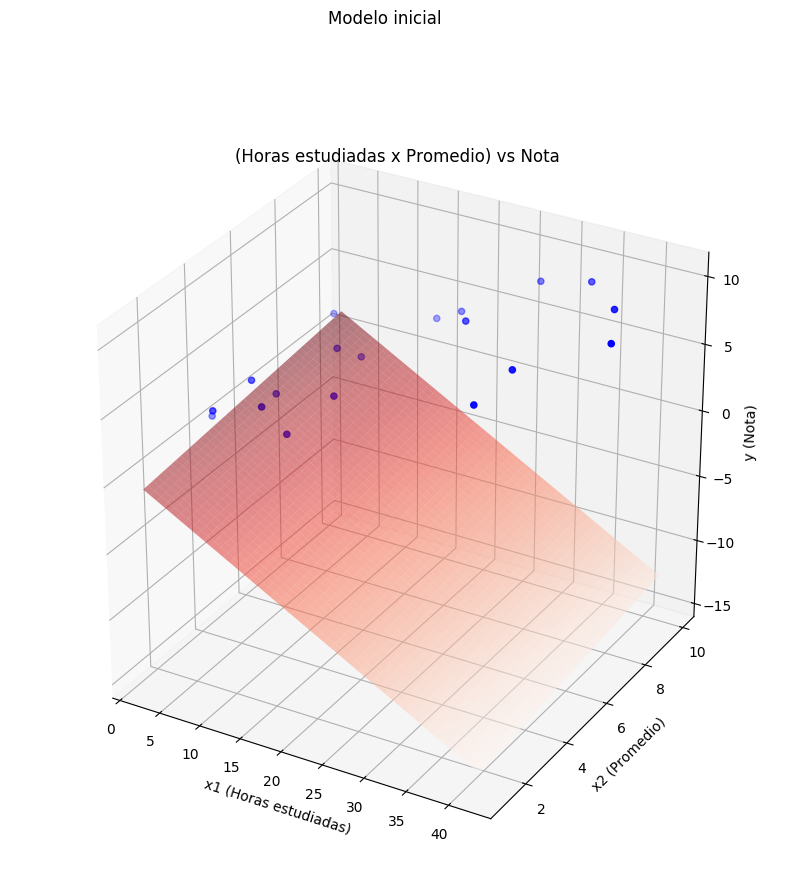

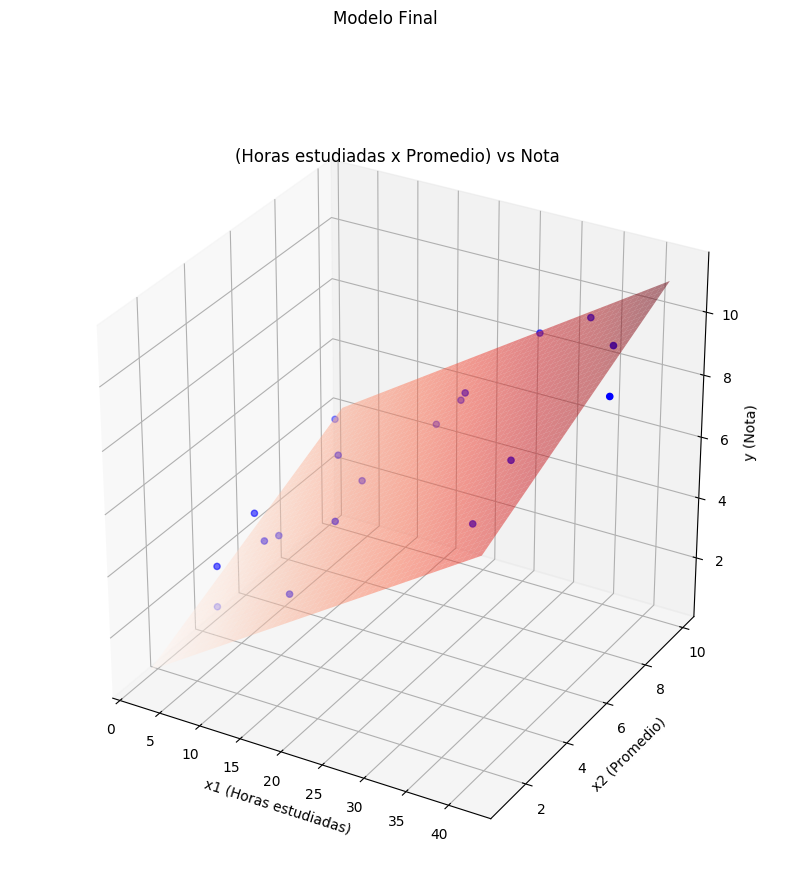

In [24]:
# Carga del dataset
import os
dataset_path=os.path.join("datasets_simples","study_regression_2d_small.csv")
data=np.loadtxt(open(dataset_path, "rb"), delimiter=",", skiprows=1)
x,y=data[:,0:2],data[:,2:3]
n,d_in=x.shape
n,d_out=y.shape

print(f'cantidad de ejemplos: {n}')
# Creación del modelo inicial
print("Inicialización aleatoria del modelo; vuelve a correr esta celda para obtener otros resultados")
# Creo un modelo lineal
modelo = keras.Sequential([
    keras.layers.Dense(d_out,input_shape=(d_in,), activation=None)])

# visualización del modelo inicial
mensaje=f"Modelo inicial"
w,b=modelo.get_weights()
print(f'w={w} y b={b}')
utils.plot_regresion_lineal(w,b,x,y,title=mensaje)


#Creo el optimizador y compilo el modelo para usarlo
alpha=0.001
# Optimizador de descenso de gradiente estocástico 
sgd = keras.optimizers.SGD(lr=alpha)
# error cuadrático medio es la métrica de error a optimizar
error_metric='mse' # IMPORTANTE

modelo.compile(
  optimizer=sgd, 
  loss=error_metric, 
  metrics=[], # metricas para ir calculando en cada iteracion o batch (ninguna ahora)
)

epochs = 15
batch_size = 32
# Entrenamiento del modelo
modelo.fit(x,y,epochs=epochs,batch_size=batch_size)

# visualiza el modelo y los datos
w,b=modelo.get_weights()
utils.plot_regresion_lineal(w,b,x,y,title="Modelo Final")

print(f'w={w}\n\r b={b}')

